## Libraries

In [1]:
#Import Libraries
import cv2
import numpy as np
from matplotlib import image
from matplotlib import pyplot as plt

## Read

In [2]:
# Read the image (one we use with numpy and the other to use with cv2) then load the text as a matrix
im = image.imread("Scene.png")
image = cv2.imread("Scene.png")
points_3D = np.loadtxt("Path.xyz",delimiter=",")


## Find The Projection Matrix

In [3]:
data = []
with open ("CameraParameter.txt",'r') as f:
    for line in f:
        data.append(line.split())#put values of the rows in the data
K = np.array(data[1:4])# use the rows 1 to 3 for K
K=K.astype(np.float64)#make it float
print(K.shape)
RT=np.array(data[6:9])#use the rows 6 to 8 for RT
RT=RT.astype(np.float64)#set to float
print(RT.shape)
P = np.matmul(K,RT)#we make the dot product
print(P)
    

(3, 3)
(3, 4)
[[ 2.79518608e+03 -1.05658390e+02 -4.56598443e+02  1.17520360e+04]
 [-2.67898170e+02 -7.46715220e+02 -2.60256770e+03  1.29485894e+04]
 [ 2.97051300e-01  8.27975300e-01 -4.75623100e-01  1.31685200e+01]]


## Calculate the 2D points

In [4]:
col = points_3D.shape[0] 
Z=np.ones((col,1))# create a column matrix with the rows of the points 3d
points_3D=np.concatenate((points_3D,Z),axis=1)#add one to every point 3d
points_3D=points_3D.T #transpose to multiply
points_2D = P @ points_3D # multiply
points_2D /= points_2D[2]# divide every point by Z
points_2D = points_2D[:2]#select only the x,y
points_2D= points_2D.astype(np.int64) # make it int
points_2D = points_2D.T #transpose to have N,2
print(points_2D)







[[ 874 -258]
 [ 874 -258]
 [ 876 -257]
 [ 878 -257]
 [ 880 -256]
 [ 883 -255]
 [ 886 -254]
 [ 890 -253]
 [ 894 -252]
 [ 899 -251]
 [ 904 -249]
 [ 909 -247]
 [ 914 -246]
 [ 920 -244]
 [ 925 -241]
 [ 931 -239]
 [ 938 -237]
 [ 944 -234]
 [ 950 -232]
 [ 957 -229]
 [ 963 -226]
 [ 970 -223]
 [ 976 -220]
 [ 983 -217]
 [ 990 -214]
 [ 996 -210]
 [1002 -206]
 [1009 -203]
 [1015 -199]
 [1021 -195]
 [1027 -191]
 [1033 -187]
 [1038 -183]
 [1044 -178]
 [1049 -174]
 [1054 -169]
 [1058 -164]
 [1063 -160]
 [1067 -155]
 [1071 -149]
 [1074 -144]
 [1078 -139]
 [1080 -133]
 [1083 -128]
 [1085 -122]
 [1087 -116]
 [1088 -110]
 [1089 -104]
 [1090  -98]
 [1090  -91]
 [1089  -85]
 [1087  -78]
 [1084  -71]
 [1080  -64]
 [1074  -57]
 [1068  -50]
 [1061  -42]
 [1053  -35]
 [1044  -27]
 [1034  -19]
 [1024  -11]
 [1012   -3]
 [1001    4]
 [ 988   12]
 [ 975   20]
 [ 961   29]
 [ 947   37]
 [ 933   46]
 [ 918   54]
 [ 903   63]
 [ 888   72]
 [ 872   81]
 [ 856   90]
 [ 840   99]
 [ 824  109]
 [ 808  118]
 [ 792  127]

## Draw and Save

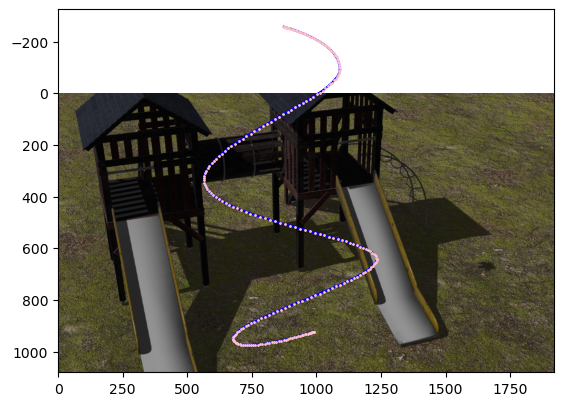

In [5]:
implot = plt.imshow(im) #we show the image in the background
x = points_2D[:,0] # select the x
y = points_2D[:,1]
plt.plot(x, y, zorder=1,c='blue')# plot x and y (line) and make it in under the plot with zorder
for i in range (points_2D.shape[0]):
    plt.scatter(points_2D[i][0],points_2D[i][1], c='pink', s=1)#plot all the 2d points


plt.show()

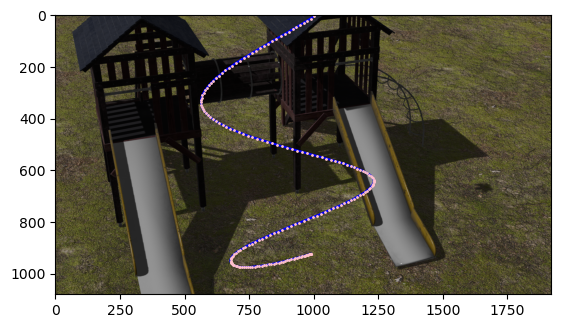

In [ ]:
#the same but we clean the data that is out of the image
implot = plt.imshow(im)
points_2D=points_2D[points_2D[:,1]>=0] #here if we have negative values we will take  off the image
x = points_2D[:,0]
y = points_2D[:,1]
plt.plot(x, y, zorder=1,c='blue')
for i in range (points_2D.shape[0]):
    plt.scatter(points_2D[i][0],points_2D[i][1], c='pink', s=1)
plt.savefig("F11215112matplot.jpg") 
plt.show()


In [ ]:
#plot but this time with cv2 library
for i in range (points_2D.shape[0]): # iterate over rows
    cv2.circle(image, points_2D[i], radius=5, color=(0, 255, 0), thickness=-1)#make a point of all the data
for i in range(points_2D.shape[0]-1):#iterate over the rows-1
    cv2.line(image, points_2D[i], points_2D[i+1], color=(255, 0, 0), thickness=2)  #connect the points
cv2.imshow("F11215112", image)
cv2.imwrite("F11215112cv2.jpg", image)
cv2.waitKey(0)#close when 0
cv2.destroyAllWindows()